# Analysis of Customer Shopping Data in India

## Purpose

The purpose of this notebook is to draw useful conclusions from a dataset obtained in India about customer shopping data. Businesses can adopt these conclusions in their marketing strategies when comparing which group of people to target for a certain product. This is for my Jenga School Foundations of Data Science Project. I will use the following data that I obtained from Kaggle:
1. Customer's Age
2. Customer's Gender
3. Customer's City
4. Customer's Annual Income
5. Customer's Credit Score 
6. Customer's Spending Score


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
file = pd.read_csv("Shopping_CustomerData.csv")
file

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1
...,...,...,...,...,...,...,...,...
195,1196,Female,54,Delhi,317466.42070,601,52,4
196,1197,Female,20,Bengaluru,323305.50020,554,58,1
197,1198,Male,44,Chennai,109058.54430,844,36,2
198,1199,Male,28,Delhi,160116.89300,837,24,4


### Data Processing 

In this space we are going to process our data so that we are left with usable data. We are going to delete the columns containing the Customer ID and CustomerCityID.

In [69]:
#delete customer Id
file = file.drop("CustomerID", axis = 1)
#delete CustomerCityId
file = file.drop("CustomerCityID", axis = 1)

In [70]:
#display new dataset
file

,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore
0,Male,49,Bengaluru,527547.58850,653,78
1,Male,59,Bengaluru,207143.19760,630,63
2,Female,54,Delhi,164423.84570,555,69
3,Female,42,Bengaluru,56220.36443,699,30
4,Female,30,Bengaluru,256194.36190,793,6
...,...,...,...,...,...,...
195,Female,54,Delhi,317466.42070,601,52
196,Female,20,Bengaluru,323305.50020,554,58
197,Male,44,Chennai,109058.54430,844,36
198,Male,28,Delhi,160116.89300,837,24


### Data Exploration

According to the dataset we have, we are going to lightly analyse it. We will find out the average age of the study, the percentage of females and males, how often the cities are repeated, the average, minimum and maximum incomes, spending scores and credit scores.

In [71]:
stats = file.describe()
stats

,CustomerAge,AnnualIncome,CreditScore,SpendingScore
count,200.000000,200.000000,200.000000,200.00000
mean,45.520000,285143.931646,719.975000,50.70500
std,16.113592,169229.187619,104.578236,28.72269
min,18.000000,2577.057456,551.000000,2.00000
25%,31.750000,153227.340950,628.250000,27.75000
50%,46.500000,263418.505550,715.000000,48.00000
75%,59.000000,384857.116200,806.250000,77.00000
max,75.000000,695407.091700,897.000000,100.00000


##### Observations

###### On Customer Age
The age range for the study is between 18 and 75, the average age being 45.
###### On Annual Income
The range of income is between 2,577 and 695,407, the average being 285,143.  
###### On Credit Score
The range of credit score is between 551 and 897, the average being 719.
###### On Spending Score
The range of spending score is between 2 and 100, the average being 50.


### Analysis of Age vs Annual Income

In this space, I would like to compare the ages from the data given and the Annual Income corresponding to the respective age. This would tell us which age bracket has the highest income, lowest income and the  average income of the ages. This would in turn help us understand what each age group can afford to buy.

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


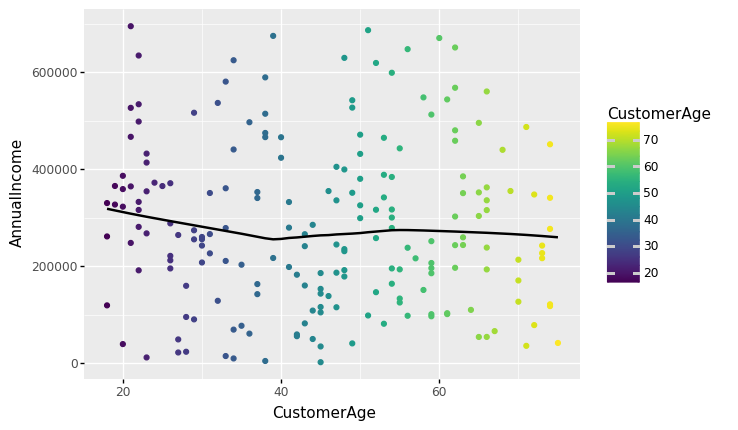

<ggplot: (109497612029)>

In [72]:
file

from plotnine import ggplot, aes, geom_point, geom_smooth
(
    ggplot(file)+
    aes(x = "CustomerAge", y = "AnnualIncome", colour = "CustomerAge")+
    geom_point()+
    geom_smooth()
)


#### Observations
From the graph above, we can tell that the average annual income is highest among the early 20s age group at slightly above 30,000. It then decreases as the customers age until almost 40, then it steadily rises and maintains.

### Analysis of Age vs Credit Score

In this space, I would like to compare the ages from the data given and the Credit Score corresponding to the respective age. This would help us understand and predict which age bracket is most likely to repay their credit, and therefore which age brackets can be allowed to buy goods on credit.

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


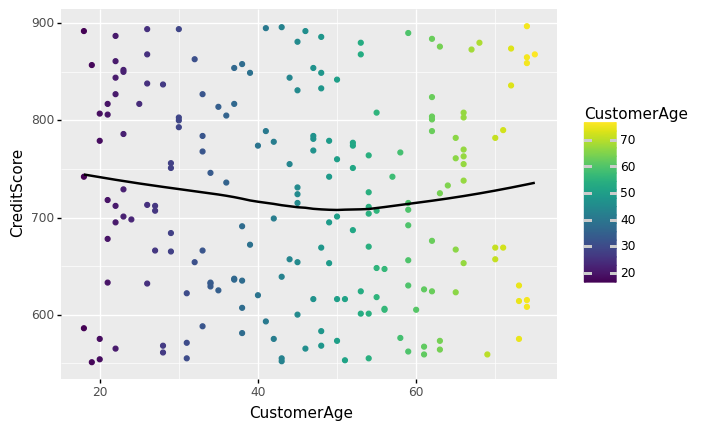

<ggplot: (109497655393)>

In [73]:
#plot a graph of age vs average credit score
file
#find out average credit score for each age
#plot line graph for credit score vs age
from plotnine import ggplot, aes, geom_point, geom_smooth
(
    ggplot(file)+
    aes(x = "CustomerAge", y = "CreditScore", colour = "CustomerAge")+
    geom_point()+
    geom_smooth()
)


#### Observations
From the graph above, we can tell that the age group with the highest credit score is the early 20s, where the score is nearing 750. It then decreases steadily until the customer is about 50 years of age, where the spending score is almost 700. It rises steadily to almost 750 once more as the customer ages.

### Analysis of Age vs Spending Score

In this space, I would like to compare the ages from the data given and the Spending Score corresponding to the respective age. A spending score is a score out of 100 given by the mall authoritiees based on the money spent and the behavior of the customer. This will help us understand how each age group spends their money, who is most likely to buy a product and each age group's attitude towards spending money. We can use this information to target certain customers for a certain product.

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


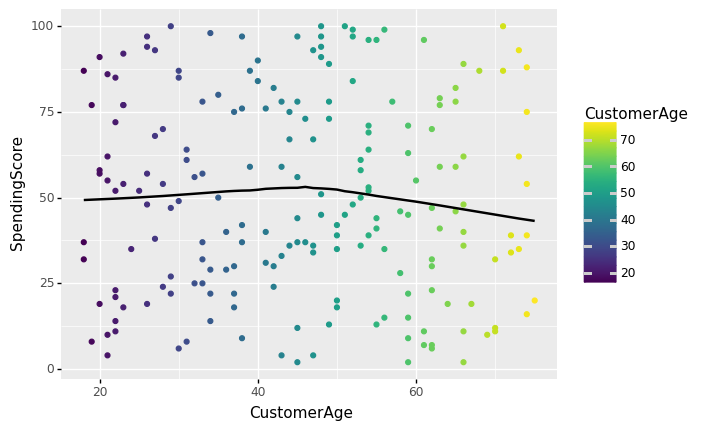

<ggplot: (109497655447)>

In [74]:
#plot a graph of age vs avg spending score
file
#find out average spending score for each age
#plot line graph for spending score vs age
from plotnine import ggplot, aes, geom_point, geom_smooth
(
    ggplot(file)+
    aes(x = "CustomerAge", y = "SpendingScore", colour = "CustomerAge")+
    geom_point()+
    geom_smooth()
)


#### Observations
From the graph above, we can tell that on average, for customers in their 20s, the spending score remains at 50. As they clock 30 years, the score rises until they are in their mid 40s at slight;y over 50. At 50 years and above, the score steadily drops until about 40.

### Conclusions from Customer Age analysis
From the data above, we can tell the following:
1. Customers in their early 20s have the highest incomes and credit scores. They also have average spending scores.
2. Customers between 40 and 60 years of age averagely have thhe least credit scores and highest spending scores.

### Analysis of Gender vs Annual Income

In this space I would like to compare the relationship between gender and annual income in India. this would help us understand which gender earns more money.

The mean female income is  294816.7149007143
The mean male income is  272833.1165955455


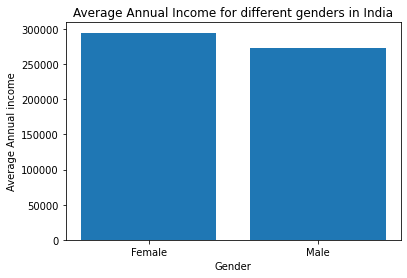

In [75]:
#get average income for each gender and compare in a bar graph
female = file.loc[file["CustomerGender"]=="Female"]
femaleIncome = female["AnnualIncome"].mean()
print("The mean female income is ",femaleIncome)

male = file.loc[file["CustomerGender"]=="Male"]
maleIncome = male["AnnualIncome"].mean()
print("The mean male income is ",maleIncome)

GenderIncome = {"Female": [femaleIncome],
                "Male": [maleIncome]
               }
GenderIncome = pd.DataFrame(GenderIncome, columns = ["Female", "Male"])
GenderIncome
#make the bar graph
genderi = ["Female", "Male"]
income = [294816, 272833]
plt.bar(genderi, income)
plt.xlabel("Gender")
plt.ylabel("Average Annual income")
plt.title("Average Annual Income for different genders in India")
plt.show()


#### Observations
From the graph above, we can tell that on average women earn more than men. The wage gap is about 21,000.

### Analysis of Gender vs Credit Score

In this space I would like to compare the relationship between gender and Credit Score in India. This wold help us understand which gender is most likely to pay off their credit, and is most likely to buy on credit.

The average Credit Score for women is  724.1785714285714
The average Credit Score for men is  714.625


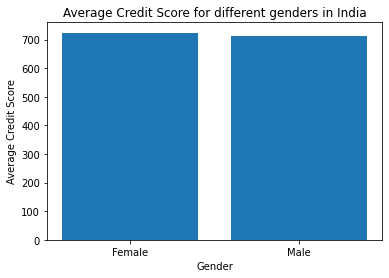

In [76]:
#get average credit score for each gender and compare in a bar graph
female = file.loc[file["CustomerGender"] == "Female"]
femalecred = female["CreditScore"].mean()
print("The average Credit Score for women is ", femalecred)

male = file.loc[file["CustomerGender"] == "Male"]
malecred = male["CreditScore"].mean()
print("The average Credit Score for men is ", malecred)

GenderCred = {"Female": [femalecred],
             "Male": [malecred]
             }
GenderCred = pd.DataFrame(GenderCred, columns = ["Female", "Male"])
GenderCred

genderc = ["Female", "Male"]
credit = [724, 714]
plt.bar(genderc, credit)
plt.xlabel("Gender")
plt.ylabel("Average Credit Score")
plt.title("Average Credit Score for different genders in India")
plt.show()

#### Observations
From the graph above, we can tell thaton average women have a higher credit score than men. the difference is about 10 points.

### Analysis of Gender vs Spending Score

In this space I would like to compare the relationship between gender and spending score in India. this will help us understand each gender's attitudes towards spending money, and how often they spend their money. this is useful when targeting customers for a certian product or service.

The average Spending Score for women is  52.955357142857146
The average Spending Score for men is  47.84090909090909


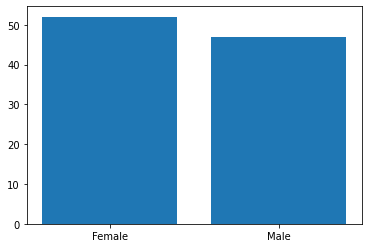

In [77]:
#get average spending score for each gender and compare in a bar graph
female = file.loc[file["CustomerGender"] == "Female"]
femalespend = female["SpendingScore"].mean()
print("The average Spending Score for women is ", femalespend)

male = file.loc[file["CustomerGender"] == "Male"]
malespend = male["SpendingScore"].mean()
print("The average Spending Score for men is ", malespend)

GenderSpend = {"Female": [femalespend],
             "Male": [malespend]
             }
GenderSpend = pd.DataFrame(GenderSpend, columns = ["Female", "Male"])
GenderSpend

genders = ["Female", "Male"]
spend = [52, 47]
plt.bar(genders, spend)
plt.show()

#### Observations
From the graph above, we can tell that women averagely have a higher spending score than men. the difference being about 5 points.

### Conclusions from Gender graphs analysis
From the data above, we can conclude that since women have the highest average income, they have the highest credit and spending scores.

### Analysis of City vs Annual Income

In this space I would like to compare the Annual income in the respecitve cities in India. this would help us identify the cities that earn more, the mean income in the cities, the mean income in India. This is helpful when getting to understand what members of a city are most likely to afford.

The average Annual Income for Chennai is  308646.1849836889
The average Annual Income for Delhi is  261862.79349356753
The average Annual Income for Bengaluru is  277244.36195819994
The average Annual Income for Kolkata is  278743.16287517245
The average Annual Income for Mumbai is  295000.3801146154


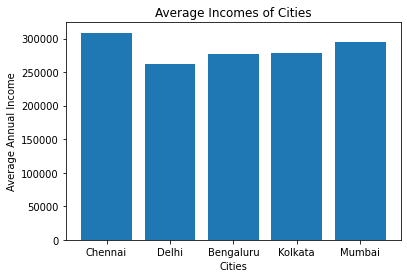

In [78]:
#get average income of each city and compare the cities in a bar graph
Chennai = file.loc[file["CustomerCity"] == "Chennai"]
chennin = Chennai["AnnualIncome"].mean()
print("The average Annual Income for Chennai is ", chennin)

Delhi = file.loc[file["CustomerCity"] == "Delhi"]
delhin = Delhi["AnnualIncome"].mean()
print("The average Annual Income for Delhi is ", delhin)

Bengaluru = file.loc[file["CustomerCity"] == "Bengaluru"]
bengain = Bengaluru["AnnualIncome"].mean()
print("The average Annual Income for Bengaluru is ", bengain)

Kolkata = file.loc[file["CustomerCity"] == "Kolkata"]
kolin = Kolkata["AnnualIncome"].mean()
print("The average Annual Income for Kolkata is ", kolin)

Mumbai = file.loc[file["CustomerCity"] == "Mumbai"]
mumbin = Mumbai["AnnualIncome"].mean()
print("The average Annual Income for Mumbai is ", mumbin)

CityIncome = {"Chennai": [chennin],
             "Delhi": [delhin],
              "Bengaluru": [bengain],
              "Kolkata": [kolin],
              "Mumbai": [mumbin]
             }
CityIncome = pd.DataFrame(CityIncome, columns = ["Chennai", "Delhi", "Bengaluru", "Kolkata", "Mumbai"])
CityIncome

cityi = ["Chennai", "Delhi", "Bengaluru", "Kolkata", "Mumbai"]
income = [308646,261862, 277244,278743, 295000]
plt.bar(cityi, income)
plt.xlabel("Cities")
plt.ylabel("Average Annual Income")
plt.title("Average Incomes of Cities")
plt.show()

#### Observations
From the graph above, we can tell that the city with the highest income is Chennai with about 308,000 shillings, followed by Mumbai with 261,000, then Kolkata and Bengaluru following closely, then Delhi.the difference between the highest and lowest earning city is 47,000.

### Analysis of City vs Credit Score

In this space I would like to compare the Credit Score in the respecitve cities in India. This will help us identify the cities with the best credit score.

The average Credit Score for Chennai is  724.3555555555556
The average Credit Score for Delhi is  719.9459459459459
The average Credit Score for Bengaluru is  703.88
The average Credit Score for Kolkata is  746.6206896551724
The average Credit Score for Mumbai is  715.7692307692307


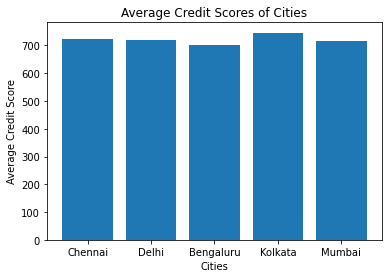

In [79]:
#get average credit score for each city then compare the cities in a bar graph
Chennai = file.loc[file["CustomerCity"] == "Chennai"]
chenncred = Chennai["CreditScore"].mean()
print("The average Credit Score for Chennai is ", chenncred)

Delhi = file.loc[file["CustomerCity"] == "Delhi"]
delhcred = Delhi["CreditScore"].mean()
print("The average Credit Score for Delhi is ", delhcred)

Bengaluru = file.loc[file["CustomerCity"] == "Bengaluru"]
bengacred = Bengaluru["CreditScore"].mean()
print("The average Credit Score for Bengaluru is ", bengacred)

Kolkata = file.loc[file["CustomerCity"] == "Kolkata"]
kolcred = Kolkata["CreditScore"].mean()
print("The average Credit Score for Kolkata is ", kolcred)

Mumbai = file.loc[file["CustomerCity"] == "Mumbai"]
mumbcred = Mumbai["CreditScore"].mean()
print("The average Credit Score for Mumbai is ", mumbcred)

CityCred = {"Chennai": [chenncred],
             "Delhi": [delhcred],
              "Bengaluru": [bengacred],
              "Kolkata": [kolcred],
              "Mumbai": [mumbcred]
             }
CityCred = pd.DataFrame(CityCred, columns = ["Chennai", "Delhi", "Bengaluru", "Kolkata", "Mumbai"])
CityCred

cityc = ["Chennai", "Delhi", "Bengaluru", "Kolkata", "Mumbai"]
credits = [724,719, 703,746, 715]
plt.bar(cityc, credits)
plt.xlabel("Cities")
plt.ylabel("Average Credit Score")
plt.title("Average Credit Scores of Cities")
plt.show()

#### Observations
From the graph above, we can tell that the city with the highest credit score is Kolkata with 746 points, followed by Chennai with 724 points then closely by Delhi and Mumbai, and lastly Bengaluru with 703 points. the difference between the highest and lowest scores is 43 points.

### Analysis of City vs Spending Score

In this space I would like to compare the Spending Score in the respecitve cities in India. This wpuld help us identify which cities in India spend the most, and the cities most likely to spend money.

The average Spending Score for Chennai is  46.022222222222226
The average Spending Score for Delhi is  47.13513513513514
The average Spending Score for Bengaluru is  49.18
The average Spending Score for Kolkata is  60.41379310344828
The average Spending Score for Mumbai is  54.23076923076923


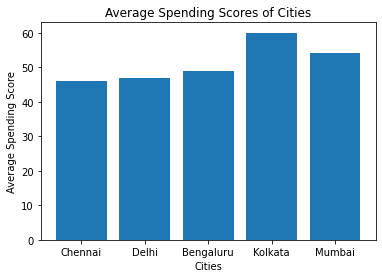

In [80]:
#get average spending score for each city then compare the cities in a bar graph
Chennai = file.loc[file["CustomerCity"] == "Chennai"]
chennspe = Chennai["SpendingScore"].mean()
print("The average Spending Score for Chennai is ", chennspe)

Delhi = file.loc[file["CustomerCity"] == "Delhi"]
delhspe = Delhi["SpendingScore"].mean()
print("The average Spending Score for Delhi is ", delhspe)

Bengaluru = file.loc[file["CustomerCity"] == "Bengaluru"]
bengaspe = Bengaluru["SpendingScore"].mean()
print("The average Spending Score for Bengaluru is ", bengaspe)

Kolkata = file.loc[file["CustomerCity"] == "Kolkata"]
kolspe = Kolkata["SpendingScore"].mean()
print("The average Spending Score for Kolkata is ", kolspe)

Mumbai = file.loc[file["CustomerCity"] == "Mumbai"]
mumbspe = Mumbai["SpendingScore"].mean()
print("The average Spending Score for Mumbai is ", mumbspe)

CitySpend = {"Chennai": [chennspe],
             "Delhi": [delhspe],
              "Bengaluru": [bengaspe],
              "Kolkata": [kolspe],
              "Mumbai": [mumbspe]
             }
CitySpend = pd.DataFrame(CitySpend, columns = ["Chennai", "Delhi", "Bengaluru", "Kolkata", "Mumbai"])
CitySpend

citys = ["Chennai", "Delhi", "Bengaluru", "Kolkata", "Mumbai"]
spending = [46,47, 49,60, 54]
plt.bar(citys, spending)
plt.xlabel("Cities")
plt.ylabel("Average Spending Score")
plt.title("Average Spending Scores of Cities")
plt.show()

#### Observations
From the graph above, we can tell that Kolkata has the highest average spending score with 60 points. It is then followed by Mumbai with 54, then closely by Bengaluru, Delhi and Chennai. The difference between the highest and lowest spending scores is 11 points.

### Conclusions from City analyses
From the observations above, we can tell the following about each city:
1. Chennai has the highest annual income, second highest credit score and the least spending score. 
2. Mumbai has the 2nd highest income, 3rd highest credit score and 2nd higest spening score.
3. Kolkata has the 3rd highst income, highest credit score and highest spending score.
4. Bengaluru has the second least annual income, least credit score and the third highest credit score.
5. Delhi ha the least annual income, second least credit score and the second least spending score.

### Analysis of Annual Income vs Credit Score

In this space I would like to compare and understand the relationship between the Annual Income and Credit Score in India across all ages, gender and cities.

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


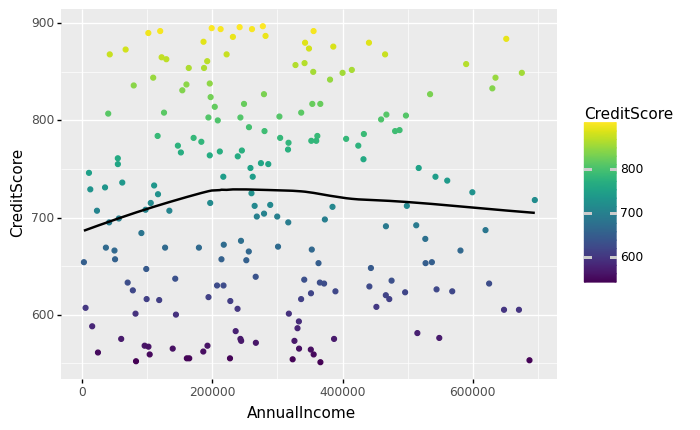

<ggplot: (109498984337)>

In [81]:
#plot a graph of annual income vs credit score
from plotnine import ggplot, aes, geom_point, geom_smooth
(
    ggplot(file)+
    aes(x = "AnnualIncome", y = "CreditScore", colour = "CreditScore")+
    geom_point()+
    geom_smooth()
)


#### Observations
from the graph above, we can tell that as the average income rises until 20,000, the credit score increases as well. it plateaus unti about 35,000, thereafter the credit score decreases with the increase in income

### Analysis of Annual Income vs Spending Score

In this space I would like to compare and understand relationship between the Annual Income and Spending Score in India across all ages, gender and cities.

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


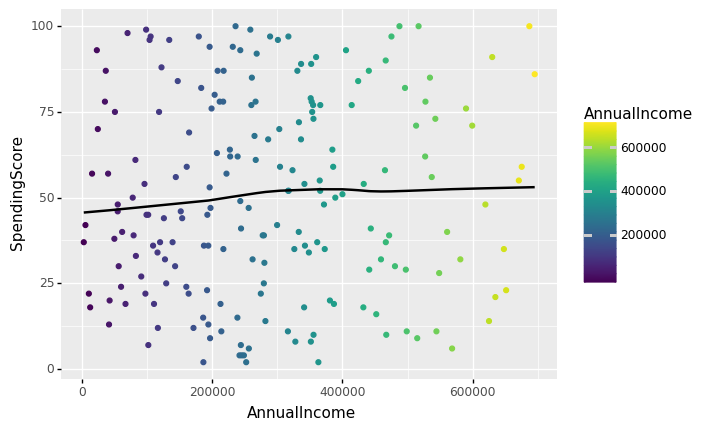

<ggplot: (109498984421)>

In [82]:
#plot a graph of annual income vs spending score
from plotnine import ggplot, aes, geom_point, geom_smooth
(
    ggplot(file)+
    aes(x = "AnnualIncome", y = "SpendingScore", colour = "AnnualIncome")+
    geom_point()+
    geom_smooth()
)


#### Observations
From the graph above, w can tell that as the average annual income increases, the averagge spending score ncreases as well.

### Analysis of Credit Score vs Spending Score

In this space I would like to compare and understand the relationship between the Credit Score and Spending Score in India across all ages, gender and cities.

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


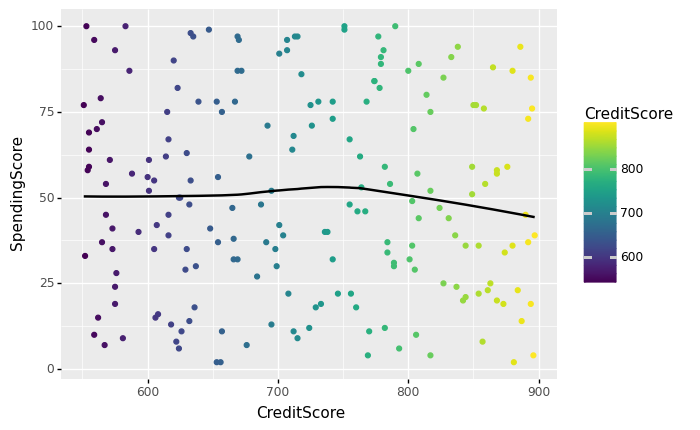

<ggplot: (109497713002)>

In [83]:
#plot a graph of credit score vs spending score
from plotnine import ggplot, aes, geom_point, geom_smooth
(
    ggplot(file)+
    aes(x = "CreditScore", y = "SpendingScore", colour = "CreditScore")+
    geom_point()+
    geom_smooth()
)


#### Observations
From the graph above, we can tell that as the credit score rises until about 650 points, the spending score is steady at 50. the spending score then peaks at slightly over 50 points as the credit score nears 750, afterwards, with the increase of credit score, the spending score decreases.

## Conclusion